---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [9]:
def answer_one():
    df = pd.read_csv('assets/fraud_data.csv')
    return len(df[df['Class'] == 1])/len(df)
answer_one()

0.016410823768035772

In [10]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [12]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score

    dummy_clf = DummyClassifier(strategy='most_frequent')

    # Fit the classifier on the training data
    dummy_clf.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = dummy_clf.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Return the accuracy score and recall score as a tuple
    return accuracy, recall
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [13]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    
    # Create an SVC classifier with default parameters
    svc_clf = SVC()

    # Fit the classifier on the training data
    svc_clf.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = svc_clf.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Calculate the precision score
    precision = precision_score(y_test, y_pred)

    # Return the accuracy score, recall score, and precision score as a tuple
    return accuracy, recall, precision
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [16]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # Create an SVC classifier with specified parameters
    svc_clf = SVC(C = 1e9, gamma = 1e-07)

    # Fit the classifier on the training data
    svc_clf.fit(X_train, y_train)

    # Get the decision function scores for the test data
    decision_scores = svc_clf.decision_function(X_test)

    # Predict the labels based on the decision function scores and threshold
    threshold = -220
    y_pred = np.where(decision_scores > threshold, 1, 0)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return cm
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


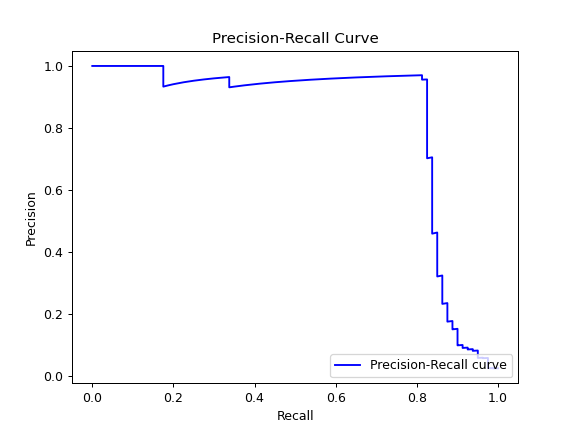

<IPython.core.display.Javascript object>


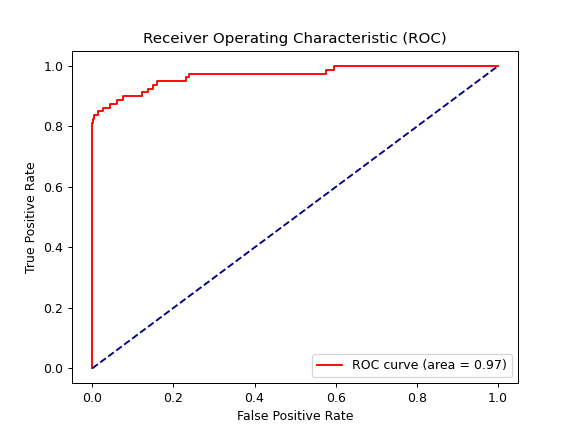

(0.825, 0.95)

In [31]:
def answer_five():
    %matplotlib notebook
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
    import matplotlib.pyplot as plt
    
    # Create a Logistic Regression classifier with default parameters
    logreg_clf = LogisticRegression(solver='liblinear')

    # Fit the classifier on the training data
    logreg_clf.fit(X_train, y_train)

    # Get the probability estimates for the test data
    y_prob = logreg_clf.predict_proba(X_test)[:, 1]

    # Create precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    # Create ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the precision-recall curve
    plt.figure()
    plt.plot(recall, precision, color='b', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
    # Specify the target precision threshold
    threshold_precision = 0.75
    # Find the index where precision is closest to the threshold precision
    index = np.argmin(np.abs(precision - threshold_precision))
    # Get the corresponding recall value at the found index
    recall_at_precision = recall[index]
    
    # Specify the target FPR threshold
    target_fpr = 0.16
    # Find the index where FPR is closest to the threshold FPR
    index = np.argmin(np.abs(fpr - target_fpr))
    # Get the corresponding TPR value at the found index
    tpr_at_fpr = tpr[index+1]
    
    return recall_at_precision, tpr_at_fpr
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [27]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}

    # Create a Logistic Regression classifier with solver='liblinear'
    logreg_clf = LogisticRegression(solver='liblinear')

    # Create a GridSearchCV object with recall scoring and 3-fold cross-validation
    grid_search = GridSearchCV(logreg_clf, param_grid, scoring='recall', cv=3)

    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)

    # Get the mean test scores of each parameter combination
    mean_test_scores = grid_search.cv_results_['mean_test_score']

    # Reshape the mean test scores into a 4x2 numpy array
    mean_test_scores = mean_test_scores.reshape(4, 2)

    return mean_test_scores
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


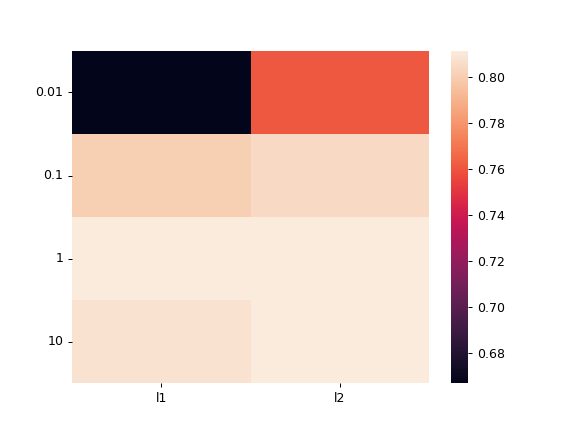

In [26]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())